In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.shape

(1252, 7)

In [4]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
crypto_df = crypto_df.drop(columns ='IsTrading')
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [8]:
crypto_df = crypto_df.dropna()
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
crypto_df.drop(columns='CoinName', axis=1, inplace= True)
crypto_df

C:\Users\makar\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [11]:
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [12]:
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [14]:
len(X.columns)

98

# PCA

In [15]:
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         6.89381651e-15, -4.16307365e-15, -1.08944414e-17],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         6.86907208e-15, -4.37800309e-15, -3.03391531e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -9.89474618e-14,  8.12004504e-14,  2.49561182e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -4.18890817e-14,  1.47082976e-14, -3.37029807e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.56237089e-15,  5.81628139e-15,  2.93333327e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         3.19907603e-15, -1.84515370e-15,  6.55787366e-17]])

In [16]:
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.121238e-11,7.247793e-15,4.985888e-14,-0.007129,-1.319756,-0.051813,...,-4.068711e-15,-2.921701e-15,6.233172e-15,-1.700418e-16,2.824095e-15,2.004597e-15,8.255597e-16,6.893817e-15,-4.163074e-15,-1.089444e-17
1,-0.318434,1.032331,-0.591126,0.001386,-1.112065e-11,7.258881e-15,5.011631e-14,-0.007739,-1.322514,-0.056674,...,-3.480770e-15,-2.859026e-15,6.459527e-15,-5.279400e-16,2.970592e-15,2.071569e-15,6.917538e-16,6.869072e-15,-4.378003e-15,-3.033915e-16
2,2.305468,1.656383,-0.683617,0.004731,-3.805810e-11,1.702648e-14,7.711541e-14,-0.054781,-1.542879,-0.943951,...,2.787749e-14,1.736826e-14,-1.976888e-13,-7.927011e-14,-1.294399e-13,-2.449878e-14,2.090025e-14,-9.894746e-14,8.120045e-14,2.495612e-14
3,-0.145184,-1.320593,0.192813,-0.001229,9.882821e-12,-4.647659e-15,-1.831416e-14,-0.002071,0.281463,0.251862,...,-1.175630e-15,-5.731113e-16,-2.781339e-14,-1.876053e-14,-2.060526e-14,-1.399252e-14,9.726403e-15,-1.941526e-14,1.164214e-14,-6.014301e-17
4,-0.151768,-2.036192,0.396182,-0.001705,1.370341e-11,-9.723924e-15,-3.946073e-14,0.027735,0.519099,0.188820,...,-9.661516e-14,4.656551e-14,-1.092011e-13,-7.961008e-14,-1.056005e-13,-6.446396e-14,9.514656e-14,-3.392030e-14,-2.216864e-14,-1.071406e-13


In [17]:
len(pca.explained_variance_ratio_)

74

For 90% explained variance, the number of features decreased from 98 to 74 principal components.

# t-SNE

In [18]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca_df)

In [19]:
tsne_features.shape

(532, 2)

In [20]:
x = tsne_features[:,0]
y = tsne_features[:,1]

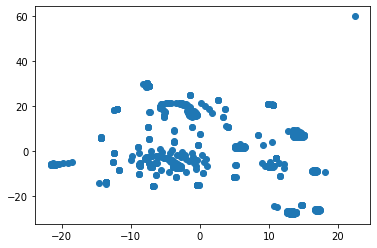

In [21]:
plt.scatter(x, y)
plt.show()

# K-Means

In [22]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\makar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,46979.075160
1,2,45909.857193
2,3,44945.686285
3,4,43778.700400
4,5,42907.897808


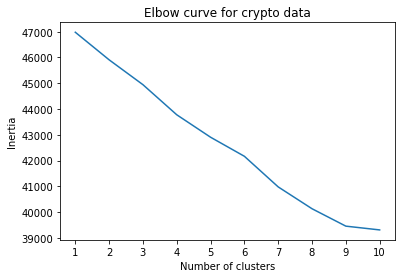

In [23]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto data')
plt.show()

The elbow of the plot appears at a K-value of 9, whereby the inertia deviates from its consistent trajectory.

As displayed on the graph, the cryptocurrencies can be grouped into 9 clusters.